# Sentiment Analysis using Financial Sentiment Analysis Dataset:

# Text Cleaning

In [ ]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset from the CSV file
df = pd.read_csv('/content/data.csv')

# Display the first few rows of the dataset
print("Original dataset:")
print(df.head())

# Function to clean and preprocess text
def clean_text(text):
    # Remove mentions, hashtags, and special characters
    text = re.sub(r"@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|[^A-Za-z\s]", "", text)
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing and removing punctuation
    tokens = [token.lower() for token in tokens if token not in string.punctuation]
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a string
    clean_text = ' '.join(tokens)
    return clean_text

# Clean and preprocess each text in the 'Sentence' column
df['cleaned_text'] = df['Sentence'].apply(clean_text)

# Display the cleaned dataset
print("\nCleaned dataset:")
print(df[['Sentence', 'cleaned_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original dataset:
                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral

Cleaned dataset:
                                            Sentence  \
0  The GeoSolutions technology will leverage Bene...   
1  $ESI on lows, down $1.50 to $2.50 BK a real po...   
2  For the last quarter of 2010 , Componenta 's n...   
3  According to the Finnish-Russian Chamber of Co...   
4  The Swedish buyout firm has sold its remaining...   

                                        cleaned_text  
0  geosolutions technology leverage benefon gps s...  
1                       esi lows bk real possibility  
2  last quarter componenta net sales doubled eurm...  
3  according finnishrussian c

#  Stemming

In [ ]:
from nltk.stem import PorterStemmer

# Function for stemming
def stem_text(tokens):
    # Initialize the Porter stemmer
    porter = PorterStemmer()
    # Stem each token in the list
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return stemmed_tokens

# Display cleaned tweets and stemmed tokens
for cleaned_texts in df['cleaned_text']:
    print(f"Cleaned text: {cleaned_texts}")
    # Tokenization for stemmed tokens
    stemmed_tokens = word_tokenize(cleaned_texts)
    # Stemming
    stemmed_tokens = stem_text(stemmed_tokens)
    print(f"Stemmed tokens: {stemmed_tokens}")
    print()


Streaming output truncated to the last 5000 lines.
Stemmed tokens: ['microsoft', 'join', 'opensourc', 'eclips', 'foundat', 'httpstcozgczakeu', 'focu', 'collabor', 'open', 'busi', 'smart', 'strategi', 'msft']

Cleaned text: said comptel delivers reliable provisioning activation solutions improve fulfilment processes operators
Stemmed tokens: ['said', 'comptel', 'deliv', 'reliabl', 'provis', 'activ', 'solut', 'improv', 'fulfil', 'process', 'oper']

Cleaned text: nokia messaging enables customers receive emails email accounts mobile phone supporting pop imap email services
Stemmed tokens: ['nokia', 'messag', 'enabl', 'custom', 'receiv', 'email', 'email', 'account', 'mobil', 'phone', 'support', 'pop', 'imap', 'email', 'servic']

Cleaned text: kemira partner project st petersburg water works
Stemmed tokens: ['kemira', 'partner', 'project', 'st', 'petersburg', 'water', 'work']

Cleaned text: svyturysutenos alus controlled nordic group baltic beverages holding bbh posted percent growth beer s

# Top Frequent Terms

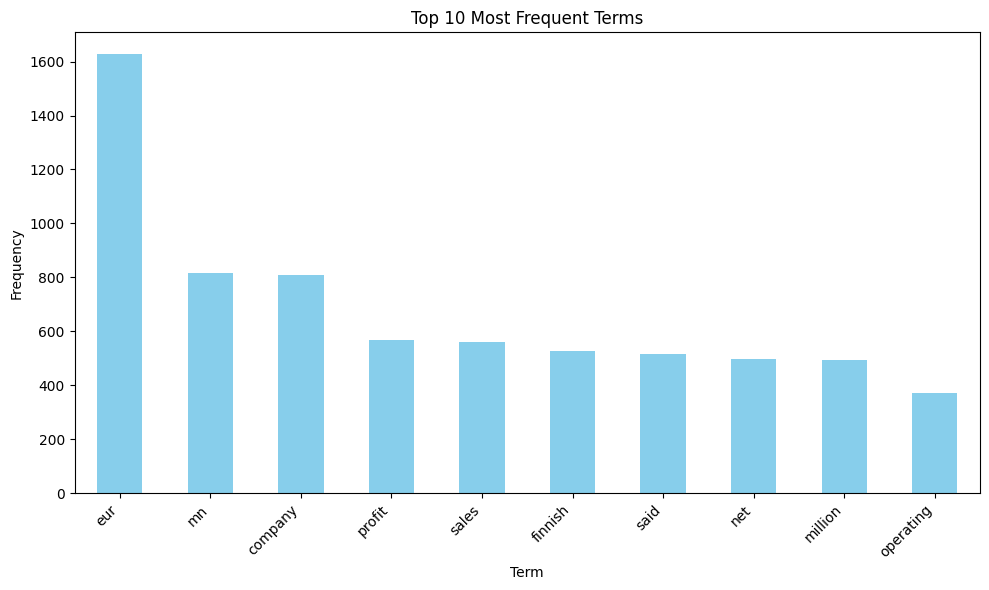

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cleaned_text' and 'Sentence' are columns in your DataFrame
# Replace 'df['Sentence']' with the actual column name if different
cleaned_texts = df['cleaned_text']

# Create term-document matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_texts)

# Get feature names (terms)
terms = vectorizer.get_feature_names_out()

# Convert sparse matrix to DataFrame
df_counts = pd.DataFrame(X.toarray(), columns=terms, index=df['Sentence'])

# Calculate total frequency of each term across all sentences
term_frequencies = df_counts.sum(axis=0)

# Sort terms by frequency and select the top N terms
N = 10  # Number of top terms to display
top_terms = term_frequencies.nlargest(N)

# Plot top N terms
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Terms')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Term Document Matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Document-Term Matrix:
                                                    aa  aal  aaland  aalto  \
Sentence                                                                     
The GeoSolutions technology will leverage Benef...   0    0       0      0   
$ESI on lows, down $1.50 to $2.50 BK a real pos...   0    0       0      0   
For the last quarter of 2010 , Componenta 's ne...   0    0       0      0   
According to the Finnish-Russian Chamber of Com...   0    0       0      0   
The Swedish buyout firm has sold its remaining ...   0    0       0      0   
...                                                 ..  ...     ...    ...   
RISING costs have forced packaging producer Huh...   0    0       0      0   
Nordic Walking was first used as a summer train...   0    0       0      0   
According shipping company Viking Line , the EU...   0    0       0      0   
In the building and home improvement trade , sa...   0    0       0      0   
HELSINKI AFX - KCI Konecranes said it has 

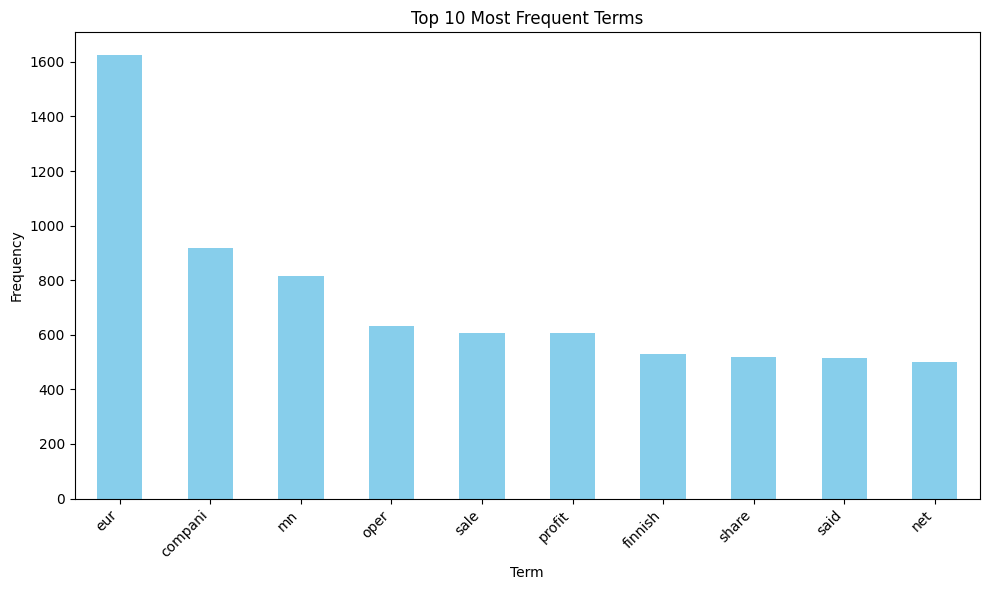

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK resources (run only once)
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset from the CSV file
df = pd.read_csv('/content/data.csv')

# Function to clean and preprocess text
def clean_text(text):
    # Remove mentions, hashtags, and special characters
    text = re.sub(r"@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|[^A-Za-z\s]", "", text)
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing and removing punctuation
    tokens = [token.lower() for token in tokens if token not in string.punctuation]
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Stemming
    stemmed_tokens = stem_text(tokens)
    # Join tokens back into a string
    clean_text = ' '.join(stemmed_tokens)
    return clean_text

# Function for stemming
def stem_text(tokens):
    # Initialize the Porter stemmer
    porter = PorterStemmer()
    # Stem each token in the list
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return stemmed_tokens

# Clean and preprocess each text in the 'Sentence' column
df['cleaned_text'] = df['Sentence'].apply(clean_text)

# Create term-document matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Get feature names (terms)
terms = vectorizer.get_feature_names_out()

# Convert sparse matrix to DataFrame
df_counts = pd.DataFrame(X.toarray(), columns=terms, index=df['Sentence'])

# Display the document-term matrix
print("Document-Term Matrix:")
print(df_counts)
print()

# Calculate total frequency of each term across all sentences
term_frequencies = df_counts.sum(axis=0)

# Sort terms by frequency and select the top N terms
N = 10  # Number of top terms to display
top_terms = term_frequencies.nlargest(N)

# Plot top N terms
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Terms')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Task - Create Word Cloud for the given data

In [ ]:
!pip install wordcloud

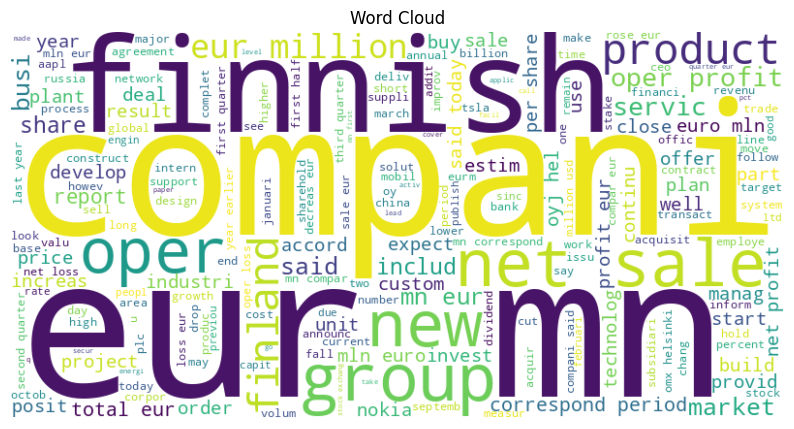

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


all_Texts = ' '.join(df['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_Texts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


# Task - Show associations for word 'comapni'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming 'cleaned_text' is the correct column name
# If not, replace it with the actual column name you used for cleaned text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Getting feature names (terms)
terms = vectorizer.get_feature_names_out()

# Converting sparse matrix to DataFrame
df_counts = pd.DataFrame(X.toarray(), columns=terms, index=df['Sentence'])

# Showing associations for the word 'compani'
target_word = 'compani'
associations = df_counts[df_counts[target_word] > 0].drop(target_word, axis=1).sum(axis=0)

# Sorting associations by frequency
associations = associations.sort_values(ascending=False)

print(f"Associations for the word '{target_word}':")
print(associations)


KeyError: 'cleaned_text'

# Sentiment Analysis

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Download NLTK resources (run only once)
nltk.download('vader_lexicon')

# Load the dataset from the CSV file
df = pd.read_csv('/content/data.csv')

# Function to clean and preprocess text
def clean_text(text):
    # Remove mentions, hashtags, and special characters
    text = re.sub(r"@[A-Za-z0-9_]+|#[A-Za-z0-9_]+|[^A-Za-z\s]", "", text)
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing and removing punctuation
    tokens = [token.lower() for token in tokens if token not in string.punctuation]
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Join tokens back into a string
    clean_text = ' '.join(tokens)
    return clean_text

# Clean and preprocess each text in the 'Sentence' column
df['cleaned_text'] = df['Sentence'].apply(clean_text)

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each text
sentiments = []
for text in df['cleaned_text']:
    sentiment_score = sia.polarity_scores(text)
    sentiments.append(sentiment_score)

# Add sentiment scores to the DataFrame
df['sentiment_scores'] = sentiments

# Print sentiment scores for each text
for i, sentiment in enumerate(df['sentiment_scores'], 1):
    print(f"Text {i}: {sentiment}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Streaming output truncated to the last 5000 lines.
Text 843: {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.34}
Text 844: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text 845: {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2732}
Text 846: {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.296}
Text 847: {'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'compound': -0.4019}
Text 848: {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.2732}
Text 849: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text 850: {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4019}
Text 851: {'neg': 0.267, 'neu': 0.571, 'pos': 0.162, 'compound': -0.2732}
Text 852: {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}
Text 853: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text 854: {'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'compound': 0.0258}
Text 855: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Text 856: {'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'com

# Sentiment Analysis Visualization

<ipython-input-24-e523c9c4d36f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=compound_scores, palette='viridis')


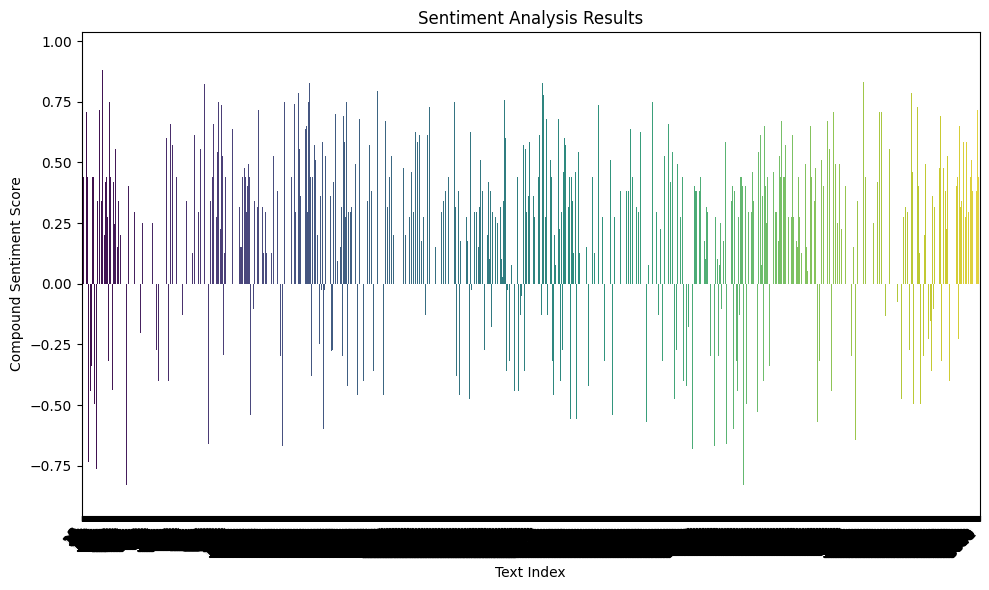

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already run the sentiment analysis code from the previous response

# Extract compound sentiment scores from the DataFrame
compound_scores = df['sentiment_scores'].apply(lambda x: x['compound'])

# Create a bar plot for sentiment visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y=compound_scores, palette='viridis')
plt.title('Sentiment Analysis Results')
plt.xlabel('Text Index')
plt.ylabel('Compound Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Distribution of Tweets Length

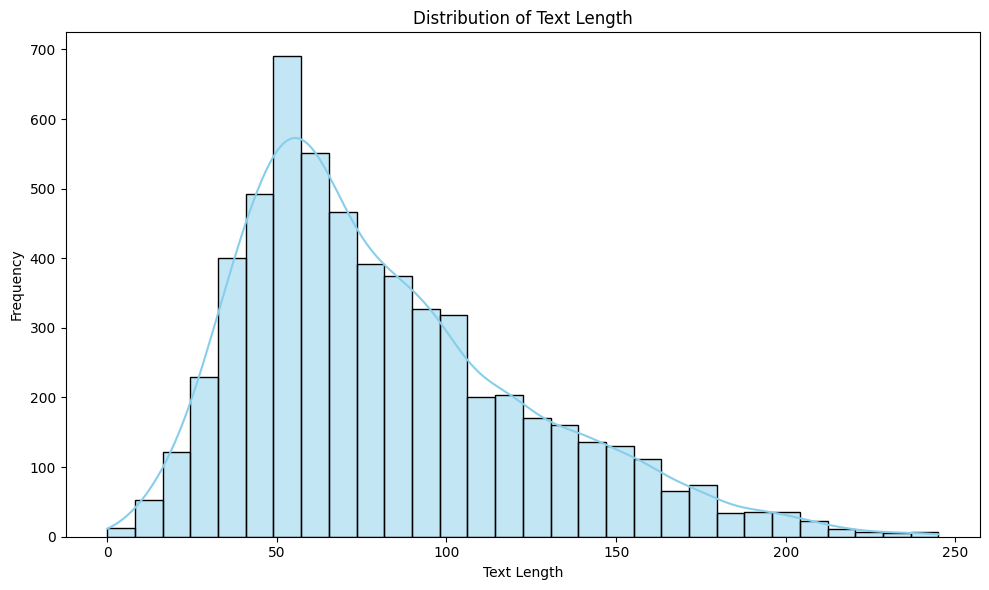

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cleaned_text' is the column containing the cleaned and preprocessed text
df['text_length'] = df['cleaned_text'].apply(len)

# Create a histogram for text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Distribution of Words

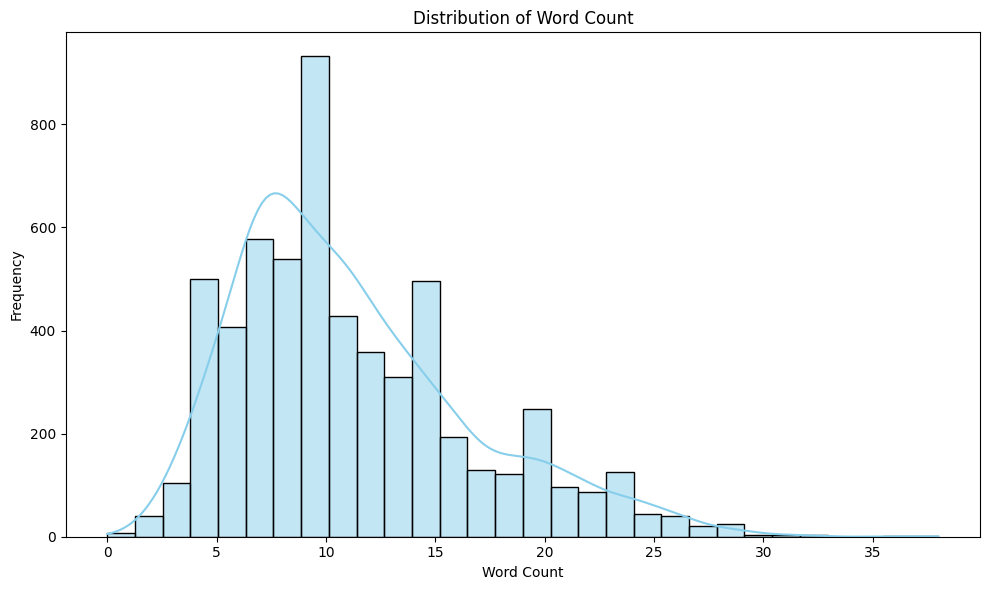

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cleaned_text' is the column containing the cleaned and preprocessed text
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Create a histogram for word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Task : Use TextBlob for Sentiment Analysis

In [ ]:
!pip install textblob

Top Text 1: cant understand theyre saying impressive watch hit ball speeds
Top Text 2: rme telcontar enables handset calculate best route includes support userdefined routes feature navigability multimodal routing via foot ferry
Top Text 3: etn upgrade today ms overweight excellent company leadership
Top Text 4: terms profitability earnings best year history chief executive velimatti mattila said
Top Text 5: stakeholders comptel involved workshops meetings filed comments issues greatest importance competitive sector industry


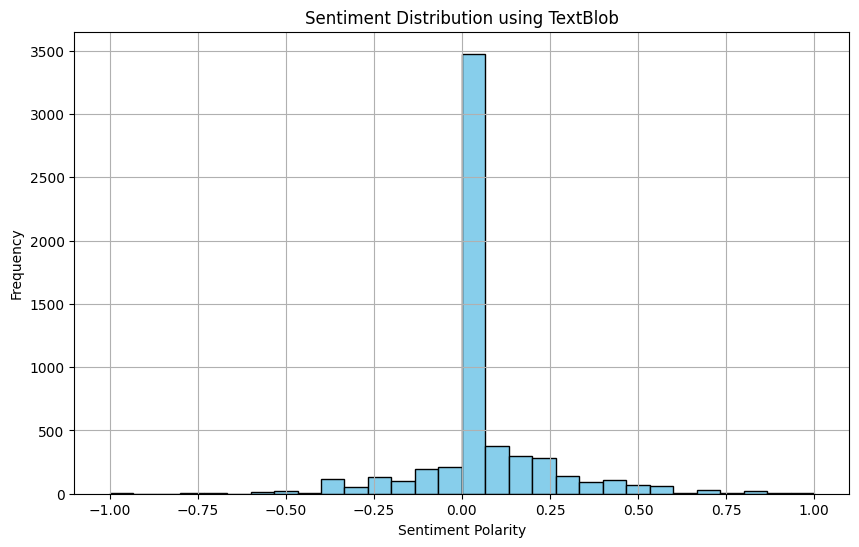

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Assuming 'cleaned_text' is the column containing the cleaned and preprocessed text
df['sentiment'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the top N texts with the highest sentiment scores
N = 5  # Change this value to the desired number of top texts
top_texts = df.nlargest(N, 'sentiment')['cleaned_text']

# Print the top texts
for i, text in enumerate(top_texts, 1):
    print(f"Top Text {i}: {text}")

# Visualize sentiments
plt.figure(figsize=(10, 6))
df['sentiment'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution using TextBlob')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


# Task: Perform all the above given operations on Twitter Dataset(Download from Kaggle)

# Task : Repeat the above task with a different dataset